<a href="https://colab.research.google.com/github/Vakhranev/Compling/blob/master/HW_4_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Network Science</center>

Home Assignment #4: Network Embeddings

#### <hr /> General Information

**Due Date:** 15.06.2020 21:00 <br>
**Late submission policy: No late submission!** <br>


Please send your reports to <iakarpov@hse.ru> with message subject of the following structure: <br>
**[HSE SNA Magolego 2020] *{LastName}* *{First Name}* HW_4*

Support your computations with figures and comments. <br>
If you are using IPython Notebook you may use this file as a starting point of your report.

## Problems

### Task 1. Generating N2V Embedding
Use any existing network from our [classes](https://dl.dropboxusercontent.com/s/8eo1sjfhu5spb0f/vk.tsv?dl=1) or your couse project. <br>
Use `cores` method if your initial network is too big. <br>

In [144]:
import networkx as nx
G = nx.read_adjlist('fb.adjlist')
core_subgraph = nx.k_core(G, k=10) #k - core level
print(core_subgraph.number_of_nodes())
print(G.number_of_nodes())

112
494


In [145]:
d = {}
Counter = 0
for node in G.nodes():
  d[node] = Counter
  Counter += 1
H = nx.relabel_nodes(G, d)

In [146]:
H.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

1.1. Train Node2Vec model with **two** different p and q parameters

In [147]:
# Start your code here
#
#
#
!pip install node2vec
!pip install graphistry

%matplotlib inline

import warnings
from collections import deque
warnings.filterwarnings('ignore')

import random
import pandas as pd
# from sklearn.manifold import TSNE
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from node2vec import Node2Vec
from node2vec.edges import HadamardEmbedder
import json
import graphistry
sns.set_style('whitegrid')

In [148]:
%autosave 60

Autosaving every 60 seconds


In [149]:
node2vec = Node2Vec(G, dimensions=100, walk_length=15, num_walks=15, workers=10, temp_folder="/mnt")
model = node2vec.fit(window=10, min_count=1, batch_words=4)
model.wv.get_vector(list(G.nodes)[0])

Computing transition probabilities: 100%|██████████| 494/494 [00:00<00:00, 1037.05it/s]




Generating walks (CPU: 5):   0%|          | 0/2 [00:00<?, ?it/s]




Generating walks (CPU: 7):   0%|          | 0/1 [00:00<?, ?it/s]





Generating walks (CPU: 2):   0%|          | 0/2 [00:00<?, ?it/s]

Generating walks (CPU: 3):   0%|          | 0/2 [00:00<?, ?it/s]


Generating walks (CPU: 4):   0%|          | 0/2 [00:00<?, ?it/s]







Generating walks (CPU: 8):   0%|          | 0/1 [00:00<?, ?it/s]






Generating walks (CPU: 6):   0%|          | 0/1 [00:00<?, ?it/s]








Generating walks (CPU: 10):   0%|          | 0/1 [00:00<?, ?it/s]





























Generating walks (CPU: 7): 100%|██████████| 1/1 [00:08<00:00,  8.59s/it]





















Generating walks (CPU: 9): 100%|██████████| 1/1 [00:08<00:00,  8.68s/it]


Generating walks (CPU: 1): 100%|██████████| 2/2 [00:08<00:00,  4.36s/it]






Generating walks (CPU: 8): 100%|██████████| 1/1 [00:08<00:00,  8.67s/it]






array([-1.7034493e-03,  1.2584093e+00, -7.5108713e-01, -1.2837240e+00,
       -2.6599872e+00, -7.4220198e-01,  6.0331529e-01,  1.2887499e-01,
       -1.7870808e-02,  8.5509926e-02,  5.5527776e-01, -3.6591628e-01,
        3.6851647e-01,  3.1179518e-01,  5.9856033e-01,  4.1842020e-01,
        1.4579233e+00, -1.1014131e+00, -9.8308104e-01,  1.4375038e+00,
       -5.4351372e-01,  1.3237861e-01, -1.2795578e+00, -9.6150178e-01,
        4.5041555e-01, -1.1189711e+00, -2.1885390e+00,  5.1114736e-03,
       -1.8188515e+00,  4.4060355e-01, -1.3941478e+00,  5.9934843e-01,
       -7.8711528e-01, -1.0722712e+00, -5.5781484e-01,  5.7062083e-03,
        4.6473500e-01,  6.4582273e-02,  6.4763182e-01, -1.6011249e+00,
       -1.7078352e+00,  6.8651289e-02,  6.6637397e-01,  7.6830244e-01,
        8.0489647e-01,  5.6789356e-01,  1.2614490e-01,  1.0413634e+00,
       -7.2958100e-01,  6.0449231e-02, -1.0284903e+00,  4.2542490e-01,
       -1.3654766e+00,  1.1320988e-01, -1.8080703e+00,  6.3099241e-01,
      

In [150]:
node2vec = Node2Vec(G, dimensions=100, walk_length=15, num_walks=15, p=10, q=10, workers=10, temp_folder="/mnt")
model = node2vec.fit(window=10, min_count=1, batch_words=4)
model.wv.get_vector(list(G.nodes)[0])

Generating walks (CPU: 2):   0%|          | 0/2 [00:00<?, ?it/s]





Generating walks (CPU: 8):   0%|          | 0/1 [00:00<?, ?it/s]






Generating walks (CPU: 3):   0%|          | 0/2 [00:00<?, ?it/s]


Generating walks (CPU: 5):   0%|          | 0/2 [00:00<?, ?it/s]



Generating walks (CPU: 6):   0%|          | 0/1 [00:00<?, ?it/s]




Generating walks (CPU: 7):   0%|          | 0/1 [00:00<?, ?it/s]







Generating walks (CPU: 1):   0%|          | 0/2 [00:00<?, ?it/s]

Generating walks (CPU: 4):   0%|          | 0/2 [00:00<?, ?it/s]








Generating walks (CPU: 10):   0%|          | 0/1 [00:00<?, ?it/s]












































Generating walks (CPU: 9): 100%|██████████| 1/1 [00:08<00:00,  8.24s/it]





















Generating walks (CPU: 2): 100%|██████████| 2/2 [00:08<00:00,  4.35s/it]




Generating walks (CPU: 3): 100%|██████████| 2/2 [00:08<00:00,  4.34s/it]



















Generating walks (CPU: 7): 100%|██████████| 1/1 [00:08<00:00,  8.68s/it

array([ 7.77103961e-01,  1.72734451e+00, -1.32408440e+00, -1.36681104e+00,
       -3.19245028e+00, -8.78694773e-01,  3.83624434e-01,  3.09055567e-01,
       -1.45894244e-01,  1.79356590e-01,  1.97800606e-01, -5.46176553e-01,
       -2.45675668e-01,  1.48576856e-01,  2.46428251e+00,  9.20078278e-01,
        1.29206324e+00, -1.04977643e+00, -4.76289093e-01,  1.13032520e+00,
       -9.51364815e-01,  2.19322458e-01, -1.23063385e+00, -5.72896063e-01,
        1.19250202e+00, -4.98025268e-01, -2.24398851e+00,  9.50291514e-01,
       -1.69891119e+00,  8.41733038e-01, -7.59957373e-01,  1.02860236e+00,
       -8.59729230e-01, -2.35467330e-01, -2.46989876e-01,  2.94223189e-01,
        1.07116175e+00, -1.35112971e-01, -4.09357287e-02, -1.45657396e+00,
       -1.95596504e+00, -3.26716363e-01,  2.43034095e-01,  6.54539540e-02,
        2.04275370e+00,  2.23431811e-01,  1.86136916e-01,  1.34577179e+00,
       -7.79814005e-01, -3.24725732e-02, -1.40986323e+00, -4.38533813e-01,
       -1.40202570e+00,  

### Task 2. Link Prediction
2.1. Perform Link Prediction through Node2Vec. Evaluate accuracy of prediction. Describe results. <br>

In [151]:
# Start your code here
#
#
#
edge_subset = random.sample (G.edges (), int(0.25*G.number_of_edges())) 

G_train = G.copy () 
G_train.remove_edges_from (edge_subset)

In [152]:
edge_subset_size = len (list (edge_subset)) 
print ("Удалено:", str (edge_subset_size)) 
print ("Осталось:", str ((G.number_of_edges() - edge_subset_size)))

Удалено: 585
Осталось: 1756


In [153]:
prediction_jaccard = list(nx.jaccard_coefficient(G_train))
score, label = zip(*[(s, (u,v) in edge_subset) for (u,v,s) in prediction_jaccard])
prediction_jaccard[:100]

[('FB_100006445782139', 'FB_100002023546201', 0.0),
 ('FB_100006445782139', 'FB_100001568428496', 0.0),
 ('FB_100006445782139', 'FB_100003432816249', 0.0),
 ('FB_100006445782139', 'FB_100004314339174', 0.0),
 ('FB_100006445782139', 'FB_757845053', 0.0),
 ('FB_100006445782139', 'FB_100005328705827', 0.0),
 ('FB_100006445782139', 'FB_100005556061223', 0.0),
 ('FB_100006445782139', 'FB_100004742556198', 0.0),
 ('FB_100006445782139', 'FB_100007793227871', 0.0),
 ('FB_100006445782139', 'FB_714604244', 0.04),
 ('FB_100006445782139', 'FB_100002898154894', 0.0),
 ('FB_100006445782139', 'FB_100025171904558', 0.0),
 ('FB_100006445782139', 'FB_100000601288503', 0.0),
 ('FB_100006445782139', 'FB_100003627105279', 0.0),
 ('FB_100006445782139', 'FB_100027102314500', 0.0),
 ('FB_100006445782139', 'FB_100004212346588', 0.08333333333333333),
 ('FB_100006445782139', 'FB_100002215337386', 0.0),
 ('FB_100006445782139', 'FB_100000896054821', 0.08333333333333333),
 ('FB_100006445782139', 'FB_100001838883437

In [154]:
def mask_test_edges(adj, test_frac=.1, val_frac=.05, prevent_disconnect=True, verbose=False):
    # NOTE: Splits are randomized and results might slightly deviate from reported numbers in the paper.

    if verbose == True:
        print('preprocessing...')

    # Remove diagonal elements
    adj = adj - sp.dia_matrix((adj.diagonal()[np.newaxis, :], [0]), shape=adj.shape)
    adj.eliminate_zeros()
    # Check that diag is zero:
    assert np.diag(adj.todense()).sum() == 0

    g = nx.from_scipy_sparse_matrix(adj)
    orig_num_cc = nx.number_connected_components(g)

    adj_triu = sp.triu(adj) # upper triangular portion of adj matrix
    adj_tuple = sparse_to_tuple(adj_triu) # (coords, values, shape), edges only 1 way
    edges = adj_tuple[0] # all edges, listed only once (not 2 ways)
    # edges_all = sparse_to_tuple(adj)[0] # ALL edges (includes both ways)
    num_test = int(np.floor(edges.shape[0] * test_frac)) # controls how large the test set should be
    num_val = int(np.floor(edges.shape[0] * val_frac)) # controls how alrge the validation set should be

    # Store edges in list of ordered tuples (node1, node2) where node1 < node2
    edge_tuples = [(min(edge[0], edge[1]), max(edge[0], edge[1])) for edge in edges]
    all_edge_tuples = set(edge_tuples)
    train_edges = set(edge_tuples) # initialize train_edges to have all edges
    test_edges = set()
    val_edges = set()

    if verbose == True:
        print('generating test/val sets...')

    # Iterate over shuffled edges, add to train/val sets
    np.random.shuffle(edge_tuples)
    for edge in edge_tuples:
        # print(edge)
        node1 = edge[0]
        node2 = edge[1]

        # If removing edge would disconnect a connected component, backtrack and move on
        g.remove_edge(node1, node2)
        if prevent_disconnect == True:
            if nx.number_connected_components(g) > orig_num_cc:
                g.add_edge(node1, node2)
                continue

        # Fill test_edges first
        if len(test_edges) < num_test:
            test_edges.add(edge)
            train_edges.remove(edge)

        # Then, fill val_edges
        elif len(val_edges) < num_val:
            val_edges.add(edge)
            train_edges.remove(edge)

        # Both edge lists full --> break loop
        elif len(test_edges) == num_test and len(val_edges) == num_val:
            break

    if (len(val_edges) < num_val or len(test_edges) < num_test):
        print("WARNING: not enough removable edges to perform full train-test split!")
        print("Num. (test, val) edges requested: (", num_test, ", ", num_val, ")")
        print("Num. (test, val) edges returned: (", len(test_edges), ", ", len(val_edges), ")")

    if prevent_disconnect == True:
        assert nx.number_connected_components(g) == orig_num_cc

    if verbose == True:
        print('creating false test edges...')

    test_edges_false = set()
    while len(test_edges_false) < num_test:
        idx_i = np.random.randint(0, adj.shape[0])
        idx_j = np.random.randint(0, adj.shape[0])
        if idx_i == idx_j:
            continue

        false_edge = (min(idx_i, idx_j), max(idx_i, idx_j))

        # Make sure false_edge not an actual edge, and not a repeat
        if false_edge in all_edge_tuples:
            continue
        if false_edge in test_edges_false:
            continue

        test_edges_false.add(false_edge)

    if verbose == True:
        print('creating false val edges...')

    val_edges_false = set()
    while len(val_edges_false) < num_val:
        idx_i = np.random.randint(0, adj.shape[0])
        idx_j = np.random.randint(0, adj.shape[0])
        if idx_i == idx_j:
            continue

        false_edge = (min(idx_i, idx_j), max(idx_i, idx_j))

        # Make sure false_edge in not an actual edge, not in test_edges_false, not a repeat
        if false_edge in all_edge_tuples or \
            false_edge in test_edges_false or \
            false_edge in val_edges_false:
            continue
            
        val_edges_false.add(false_edge)

    if verbose == True:
        print('creating false train edges...')

    train_edges_false = set()
    while len(train_edges_false) < len(train_edges):
        idx_i = np.random.randint(0, adj.shape[0])
        idx_j = np.random.randint(0, adj.shape[0])
        if idx_i == idx_j:
            continue

        false_edge = (min(idx_i, idx_j), max(idx_i, idx_j))

        # Make sure false_edge in not an actual edge, not in test_edges_false, 
            # not in val_edges_false, not a repeat
        if false_edge in all_edge_tuples or \
            false_edge in test_edges_false or \
            false_edge in val_edges_false or \
            false_edge in train_edges_false:
            continue

        train_edges_false.add(false_edge)

    if verbose == True:
        print('final checks for disjointness...')

    # assert: false_edges are actually false (not in all_edge_tuples)
    assert test_edges_false.isdisjoint(all_edge_tuples)
    assert val_edges_false.isdisjoint(all_edge_tuples)
    assert train_edges_false.isdisjoint(all_edge_tuples)

    # assert: test, val, train false edges disjoint
    assert test_edges_false.isdisjoint(val_edges_false)
    assert test_edges_false.isdisjoint(train_edges_false)
    assert val_edges_false.isdisjoint(train_edges_false)

    # assert: test, val, train positive edges disjoint
    assert val_edges.isdisjoint(train_edges)
    assert test_edges.isdisjoint(train_edges)
    assert val_edges.isdisjoint(test_edges)

    if verbose == True:
        print('creating adj_train...')

    # Re-build adj matrix using remaining graph
    adj_train = nx.adjacency_matrix(g)

    # Convert edge-lists to numpy arrays
    train_edges = np.array([list(edge_tuple) for edge_tuple in train_edges])
    train_edges_false = np.array([list(edge_tuple) for edge_tuple in train_edges_false])
    val_edges = np.array([list(edge_tuple) for edge_tuple in val_edges])
    val_edges_false = np.array([list(edge_tuple) for edge_tuple in val_edges_false])
    test_edges = np.array([list(edge_tuple) for edge_tuple in test_edges])
    test_edges_false = np.array([list(edge_tuple) for edge_tuple in test_edges_false])

    if verbose == True:
        print('Done with train-test split!')
        print('')

    # NOTE: these edge lists only contain single direction of edge!
    return adj_train, train_edges, train_edges_false, \
        val_edges, val_edges_false, test_edges, test_edges_false

In [155]:
def sparse_to_tuple(sparse_mx):
    if not sp.isspmatrix_coo(sparse_mx):
        sparse_mx = sparse_mx.tocoo()
    coords = np.vstack((sparse_mx.row, sparse_mx.col)).transpose()
    values = sparse_mx.data
    shape = sparse_mx.shape
    return coords, values, shape

In [156]:
import scipy.sparse as sp
adj_train, train_edges, train_edges_false, val_edges, val_edges_false, \
    test_edges, test_edges_false = mask_test_edges(adj_sparse, test_frac=.3, val_frac=.1)

pos_train_edge_embs = get_edge_embeddings(train_edges)
neg_train_edge_embs = get_edge_embeddings(train_edges_false)
train_edge_embs = np.concatenate([pos_train_edge_embs, neg_train_edge_embs])

train_edge_labels = np.concatenate([np.ones(len(train_edges)), np.zeros(len(train_edges_false))])

from sklearn.linear_model import LogisticRegression
edge_classifier = LogisticRegression(random_state=0)
edge_classifier.fit(train_edge_embs, train_edge_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [157]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score

pos_val_edge_embs = get_edge_embeddings(val_edges)
neg_val_edge_embs = get_edge_embeddings(val_edges_false)
val_edge_embs = np.concatenate([pos_val_edge_embs, neg_val_edge_embs])
val_edge_labels = np.concatenate([np.ones(len(val_edges)), np.zeros(len(val_edges_false))])

val_preds = edge_classifier.predict_proba(val_edge_embs)[:, 1]
val_roc = roc_auc_score(val_edge_labels, val_preds)
val_ap = average_precision_score(val_edge_labels, val_preds)

In [158]:
pos_test_edge_embs = get_edge_embeddings(test_edges)
neg_test_edge_embs = get_edge_embeddings(test_edges_false)
test_edge_embs = np.concatenate([pos_test_edge_embs, neg_test_edge_embs])

test_preds = edge_classifier.predict_proba(test_edge_embs)[:, 1]
test_roc = roc_auc_score(test_edge_labels, test_preds)
test_ap = average_precision_score(test_edge_labels, test_preds)

In [159]:
print('node2vec Validation ROC score: ', str(val_roc))
print('node2vec Validation AP score: ', str(val_ap))
print('node2vec Test ROC score: ', str(test_roc))
print('node2vec Test AP score: ', str(test_ap))

node2vec Validation ROC score:  0.9971875228285485
node2vec Validation AP score:  0.9970698645058225
node2vec Test ROC score:  0.9957143205006452
node2vec Test AP score:  0.9959911521588007


Точность предсказания довольно высокая

### Task 3. Node clustering
3.1. Perform Node classification through Node2Vec. How does it compare to the community detection from HW2 ? <br>

In [164]:
# Start your code here
#
#
#
def detect_communities_label_propagation(G):
    communities = list()
    for c in label_propagation_communities(G):
        communities.append(sorted(c))
    return sorted(communities)

In [166]:
from networkx.algorithms import community
from networkx.algorithms.community import label_propagation_communities
result = detect_communities_label_propagation(G)

In [167]:
def show_communities(G, communities, name='title'):
    pos=nx.spring_layout(G)
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    plt.figure()
    plt.title(name, fontsize=20)
    aux = 0
    for community in communities:
        nx.draw_networkx_nodes(G, pos, community, node_size = 50, node_color = colors[aux])
        aux = aux + 1
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show(block=True)

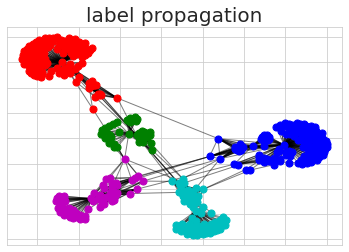

In [171]:
import matplotlib.pyplot as plt
show_communities(G, result, name='label propagation')

Here we have 5 clusters again, as in the second homework.